In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from citipy import citipy
import requests
from datetime import datetime
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, the we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

605

In [5]:
# URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=62b732c85c4beda33a39d57a62ef408b


In [18]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_title = city_weather["name"]
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city_title,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pokhara
Processing Record 2 of Set 1 | sawakin
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | bijie
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | islamkot
Processing Record 7 of Set 1 | nanortalik
Processing Record 8 of Set 1 | hays
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | vernon
Processing Record 11 of Set 1 | aparecida
Processing Record 12 of Set 1 | mendi
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | margate
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | tual
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | fredericton
Processing Record 23 of Set 1 | comodoro riva

Processing Record 40 of Set 4 | smithers
Processing Record 41 of Set 4 | san quintin
Processing Record 42 of Set 4 | hasaki
Processing Record 43 of Set 4 | vila franca do campo
Processing Record 44 of Set 4 | bowen
Processing Record 45 of Set 4 | avarua
Processing Record 46 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 47 of Set 4 | pepperell
Processing Record 48 of Set 4 | chimbarongo
Processing Record 49 of Set 4 | quatre cocos
Processing Record 50 of Set 4 | zhaozhou
Processing Record 1 of Set 5 | palu
Processing Record 2 of Set 5 | prince rupert
Processing Record 3 of Set 5 | yulara
Processing Record 4 of Set 5 | ancud
Processing Record 5 of Set 5 | miandrivazo
Processing Record 6 of Set 5 | severo-kurilsk
Processing Record 7 of Set 5 | dingle
Processing Record 8 of Set 5 | kodiak
Processing Record 9 of Set 5 | pevek
Processing Record 10 of Set 5 | meulaboh
Processing Record 11 of Set 5 | bethel
Processing Record 12 of Set 5 | kushima
Processing Record 13 of 

Processing Record 28 of Set 8 | calabozo
Processing Record 29 of Set 8 | licheng
Processing Record 30 of Set 8 | tasiilaq
Processing Record 31 of Set 8 | tyup
Processing Record 32 of Set 8 | camacupa
Processing Record 33 of Set 8 | ossora
Processing Record 34 of Set 8 | tandil
Processing Record 35 of Set 8 | bilma
Processing Record 36 of Set 8 | bulgan
Processing Record 37 of Set 8 | hokitika
Processing Record 38 of Set 8 | wana
Processing Record 39 of Set 8 | avera
Processing Record 40 of Set 8 | coquimbo
Processing Record 41 of Set 8 | ayiasma
City not found. Skipping...
Processing Record 42 of Set 8 | praxedis guerrero
Processing Record 43 of Set 8 | namatanai
Processing Record 44 of Set 8 | yanan
City not found. Skipping...
Processing Record 45 of Set 8 | varna
Processing Record 46 of Set 8 | vaasa
Processing Record 47 of Set 8 | kavaratti
Processing Record 48 of Set 8 | fukuma
Processing Record 49 of Set 8 | port-de-paix
City not found. Skipping...
Processing Record 50 of Set 8 | 

Processing Record 14 of Set 12 | uttaradit
Processing Record 15 of Set 12 | tabou
Processing Record 16 of Set 12 | ingham
Processing Record 17 of Set 12 | abu zabad
Processing Record 18 of Set 12 | port-cartier
Processing Record 19 of Set 12 | mackay
Processing Record 20 of Set 12 | chagda
City not found. Skipping...
Processing Record 21 of Set 12 | busayra
Processing Record 22 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 23 of Set 12 | mentok
City not found. Skipping...
Processing Record 24 of Set 12 | sao jose da coroa grande
Processing Record 25 of Set 12 | chegdomyn
Processing Record 26 of Set 12 | vilyuysk
Processing Record 27 of Set 12 | takhtamygda
Processing Record 28 of Set 12 | taksimo
Processing Record 29 of Set 12 | tautira
Processing Record 30 of Set 12 | banjarmasin
Processing Record 31 of Set 12 | mount isa
Processing Record 32 of Set 12 | olga
Processing Record 33 of Set 12 | ambulu
Processing Record 34 of Set 12 | yangjiang
Processing Record 

In [19]:
len(city_data)

558

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pokhara,28.2333,83.9833,69.28,92,98,2.57,NP,2021-09-30 19:33:46
1,Sawākin,19.1059,37.3321,86.99,53,94,5.82,SD,2021-09-30 19:36:44
2,Busselton,-33.6500,115.3333,60.08,89,27,17.58,AU,2021-09-30 19:36:44
3,Bijie,27.3125,105.2942,60.15,86,0,2.84,CN,2021-09-30 19:36:44
4,Bambous Virieux,-20.3428,57.7575,72.21,78,40,12.66,MU,2021-09-30 19:36:45
5,Islamkot,24.6997,70.1770,80.91,82,100,9.93,PK,2021-09-30 19:36:45
6,Nanortalik,60.1432,-45.2371,37.51,56,0,2.82,GL,2021-09-30 19:36:46
7,Hays,30.0502,-98.0336,91.99,59,6,5.99,US,2021-09-30 19:36:46
8,Punta Arenas,-53.1500,-70.9167,46.51,42,0,26.46,CL,2021-09-30 19:36:46
9,Vernon,50.2581,-119.2691,61.99,73,100,1.99,CA,2021-09-30 19:36:47


In [25]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pokhara,NP,2021-09-30 19:33:46,28.2333,83.9833,69.28,92,98,2.57
1,Sawākin,SD,2021-09-30 19:36:44,19.1059,37.3321,86.99,53,94,5.82
2,Busselton,AU,2021-09-30 19:36:44,-33.6500,115.3333,60.08,89,27,17.58
3,Bijie,CN,2021-09-30 19:36:44,27.3125,105.2942,60.15,86,0,2.84
4,Bambous Virieux,MU,2021-09-30 19:36:45,-20.3428,57.7575,72.21,78,40,12.66
5,Islamkot,PK,2021-09-30 19:36:45,24.6997,70.1770,80.91,82,100,9.93
6,Nanortalik,GL,2021-09-30 19:36:46,60.1432,-45.2371,37.51,56,0,2.82
7,Hays,US,2021-09-30 19:36:46,30.0502,-98.0336,91.99,59,6,5.99
8,Punta Arenas,CL,2021-09-30 19:36:46,-53.1500,-70.9167,46.51,42,0,26.46
9,Vernon,CA,2021-09-30 19:36:47,50.2581,-119.2691,61.99,73,100,1.99


In [26]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant field from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

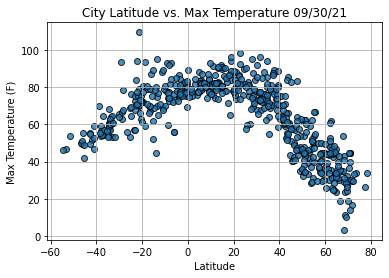

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show the plot
plt.show()

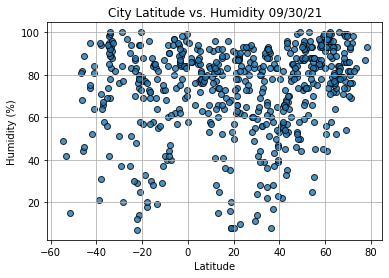

In [32]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show the plot
plt.show()

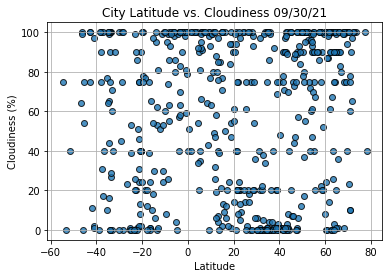

In [34]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show the plot
plt.show()

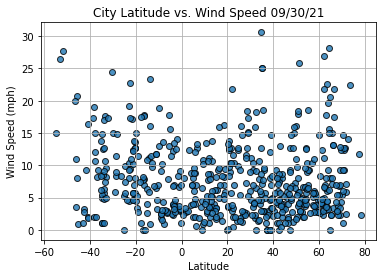

In [36]:
# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()